# Practical Statistics for Data Scientists with Python 



## Chapter 1. Exploratory Data Analysis 

Import required packages

In [2]:
%matplotlib inline

import pandas as pd 
import numpy as np 
from  scipy.stats import trim_mean
from statsmodels import robust
import wquantiles 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings 
warnings.filterwarnings('ignore')

## Example: Location Estimates of Population and Murdder Rates

In [3]:
# reading the data 
state = pd.read_csv('data/state.csv')
state.head(10)


,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


Compute mean, trimmed mean and median for the population. 

In [4]:
#calculate mean of population 
mean_population = state['Population'].mean()
mean_population


6162876.3

The trimmed mean is a statistical measure that is calculated by removing a certain proportion of the smallest and largest values in a dataset and then calculating the mean of the remaining values.


In [5]:
# we can use trim_mean fuction from scipy.stats 
# 0.1 in trim mean reffers we remove smallest and largest 10% of data
trimmed_mean = trim_mean(state['Population'], 0.1)
trimmed_mean

4783697.125

In [6]:
#median 
median_popultn = state['Population'].median()
median_popultn

4436369.5

For weighted mean wee can use numpy and for weighted median we can use package `wquantiles` (https://pypi.org/project/wquantiles/)

In [7]:
# mean of state-murder rates
state['Murder.Rate'].mean()

4.066

In [8]:
# weighted mean of state murder rates
np.average(state['Murder.Rate'], weights= state['Population'])


4.445833981123393

In [9]:
#median murder rates 
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

## Estimates of Variability

In [10]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


### Standard Deviation 
Standard deviation is a statistical measure that quantifies the amount of variation or dispersion of a set of data values from their mean or average value. In other words, it shows how spread out the data is from the average. A smaller standard deviation indicates that the data values are tightly clustered around the mean, while a larger standard deviation indicates that the data values are more spread out. It is calculated by taking the square root of the variance of the data set. Standard deviation is commonly used in fields such as finance, science, engineering, and social sciences to analyze data and make statistical inferences.


In [11]:
# Standard deviation of population 
state['Population'].std()

6848235.347401142

Interquartile range is calculated as the difference of the 75% and 25% quantile

In [12]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)


4847308.0

Median absolute deviation from the median can be calculated with a method in _statsmodels_

In [13]:
robust.scale.mad(state['Population'])

3849876.1459979336

## Percentiles and Boxplots

Pandas as the _quantile_ method for data frames

In [14]:
state['Murder.Rate'].quantile([0.05, 0.1, 0.2,0.25, 0.5, 0.75, 0.9, 0.95])

0.05    1.600
0.10    1.890
0.20    2.300
0.25    2.425
0.50    4.000
0.75    5.550
0.90    6.010
0.95    6.510
Name: Murder.Rate, dtype: float64

In [15]:
percents = [0.05, 0.25, 0.5, 0.75, 0.9]
df = pd.DataFrame(state['Murder.Rate'].quantile(percents))
df.index = [f'{p*100}%' for p in percents]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,90.0%
Murder.Rate,1.6,2.425,4.0,5.55,6.01


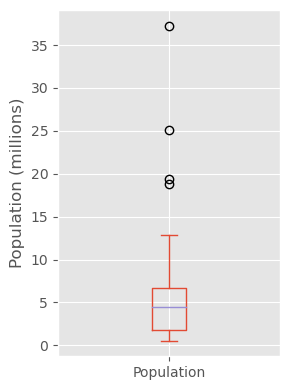

In [16]:
ax = (state['Population']/ 1_000_000).plot.box(figsize=(3,4))
ax.set_ylabel('Population (millions)')
plt.tight_layout()
plt.show()

# Frequency Tables and Histograms
The `cut` method for _pandas_ data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method `value_counts` returns a frequency table.


In [17]:
binned_Population = pd.cut(state['Population'], 10)
binned_Population.value_counts().to_frame()

,Population
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0
"(29915890.0, 33584923.0]",0


In [18]:
binned_Population.name = 'binnedpopulation'
df = pd.concat([state, binned_Population], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedpopulation'):
    groups.append({
        'Bin_range': group,
        'Count': len(subset),
        'States':','.join(subset.Abbreviation)
        })
print(pd.DataFrame(groups))

                  Bin_range  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

In [19]:
df

,State,Population,Murder.Rate,Abbreviation,binnedpopulation
49,Wyoming,563626,2.7,WY,"(526935.67, 4232659.0]"
44,Vermont,625741,1.6,VT,"(526935.67, 4232659.0]"
33,North Dakota,672591,3.0,ND,"(526935.67, 4232659.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
40,South Dakota,814180,2.3,SD,"(526935.67, 4232659.0]"
7,Delaware,897934,5.8,DE,"(526935.67, 4232659.0]"
25,Montana,989415,3.6,MT,"(526935.67, 4232659.0]"
38,Rhode Island,1052567,2.4,RI,"(526935.67, 4232659.0]"
28,New Hampshire,1316470,0.9,NH,"(526935.67, 4232659.0]"
18,Maine,1328361,1.6,ME,"(526935.67, 4232659.0]"


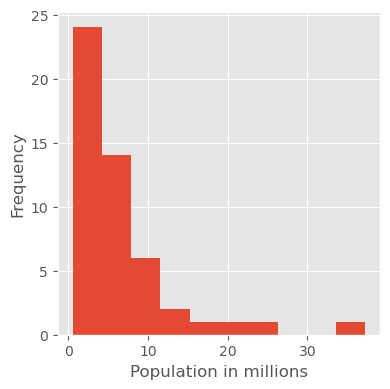

In [20]:
# histograms
ax = (state['Population']/ 1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population in millions')
plt.tight_layout()
plt.show()

# Density Estimates
Density is an alternative to histograms that can provide more insight into the distribution of the data points. Use the argument `bw_method` to control the smoothness of the density curve.


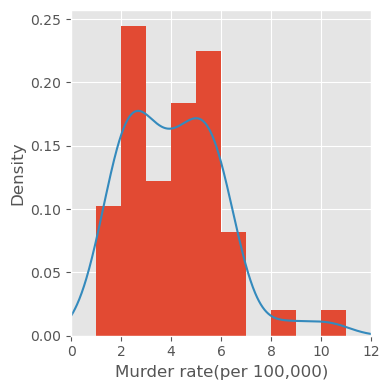

In [21]:
ax= state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12],
                                   bins= range(1,12), figsize=(4,4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder rate(per 100,000)')

plt.tight_layout()
plt.show()

----------------------------

# Exploring Binary and Categorical Data

In [22]:
airport = pd.read_csv('data/dfw_airline.csv')
100 * airport / airport.values.sum()

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


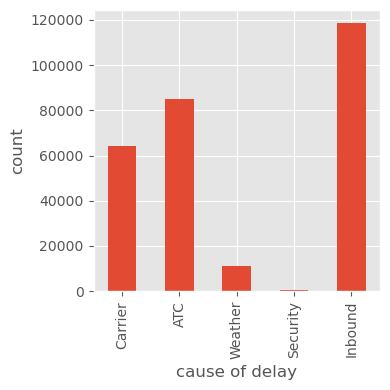

In [23]:
# Pandas also support bar charts for displaying single categorical variable

ax= airport.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('cause of delay')
ax.set_ylabel('count')

plt.tight_layout()
plt.show()

-----------------------------

# Correlation 

Read the required data sets


In [24]:
sp500_sym = pd.read_csv('data/sp500_sectors.csv')
sp500_px = pd.read_csv('data/sp500_data.csv.gz', index_col=0)


In [25]:
sp500_px.shape

(5647, 517)

In [26]:
# Determine telecommunication symbols from sp500_sym data set
telecom_sym = sp500_sym[sp500_sym['sector']== 'telecommunications_services']['symbol']

In [27]:
telecom_sym

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

In [28]:
#filter data from july 2013 
telecom = sp500_px.loc[sp500_px.index >= '2013-07-01', telecom_sym]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2013-07-01 -0.088712 -0.150486 -0.025898  0.063352 -0.280001
2013-07-02  0.212901  0.159341 -0.043164  0.244359 -0.469999
2013-07-03  0.133062  0.212454 -0.025898  0.407263  0.500000
2013-07-05  0.026615  0.044261 -0.017266  0.000000  0.370001
2013-07-08 -0.035932 -0.212455  0.025898  0.063995 -0.290001
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[505 rows x 5 columns]


Next focus on funds traded on major exchanges (sector = 'etf')


In [29]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                sp500_sym[sp500_sym['sector']=='etf']['symbol']]

etfs.head()


,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


Due to large number of columns in the table correlation matrix is not convinient. Heatmap is more convinient and eas to visualize.

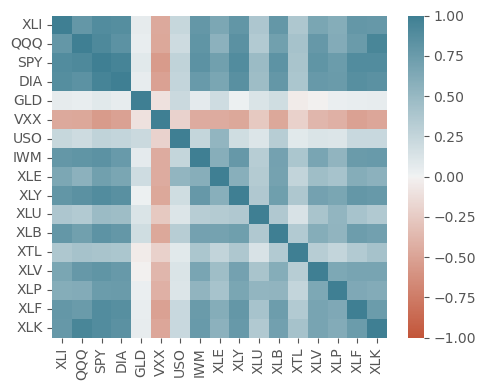

In [30]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)
plt.tight_layout()
plt.show()

The above heatmap works when you have color. For the greyscale images, as used in the book, we need to visualize the direction as well. 

## Scatterplots 

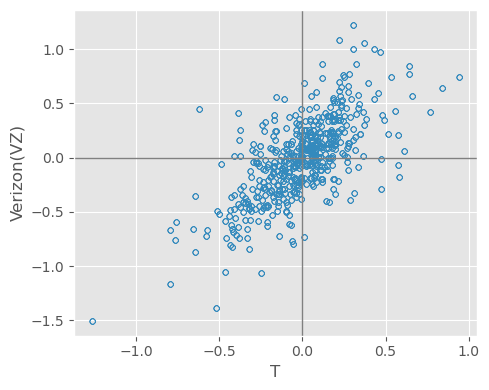

In [31]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(5, 4), marker='$\u25EF$')
ax.set_label('ATT(T)')
ax.set_ylabel('Verizon(VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)
plt.tight_layout()
plt.show()

Line2D(_child2)


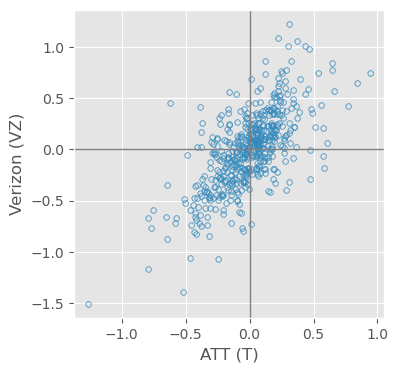

In [32]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

## Exploring Two or More Variables

Load kc_tax dataset explore the dataset based on a variety of criteria

In [33]:
kc_tax_raw = pd.read_csv('data/kc_tax.csv.gz')
kc_tax_raw.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [34]:
kc_tax_raw.SqFtTotLiving.describe()

count    498249.000000
mean       2057.651714
std         938.705293
min           0.000000
25%        1410.000000
50%        1900.000000
75%        2520.000000
max       48160.000000
Name: SqFtTotLiving, dtype: float64

Filter the dataset on criteria 

In [35]:
kc_tax = kc_tax_raw[(kc_tax_raw['TaxAssessedValue']<1_000_000)&
                    (kc_tax_raw['SqFtTotLiving']>150) &
                    (kc_tax_raw['SqFtTotLiving']<10_000)]
kc_tax.shape

(472500, 3)

In [36]:
#drop the rows with missing values 
kc_tax.dropna(inplace=True)

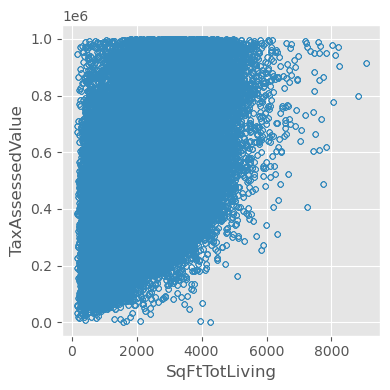

In [37]:
ax = kc_tax.plot.scatter(x='SqFtTotLiving',
                         y='TaxAssessedValue',
                         figsize=(4,4),
                         marker= '$\u25EF$')
plt.tight_layout()
plt.show()

As we can see from the **scatter plot** above it becomes redundant to use scatter plots when we have larger data points 

## Hexagonal Binning and Contours

### Plotting numeric versus numeric data
If the number of data points gets large, scatter plots will no longer be meaningful. Here methods that visualize densities are more useful. The `hexbin` method for _pandas_ data frames is one powerful approach.

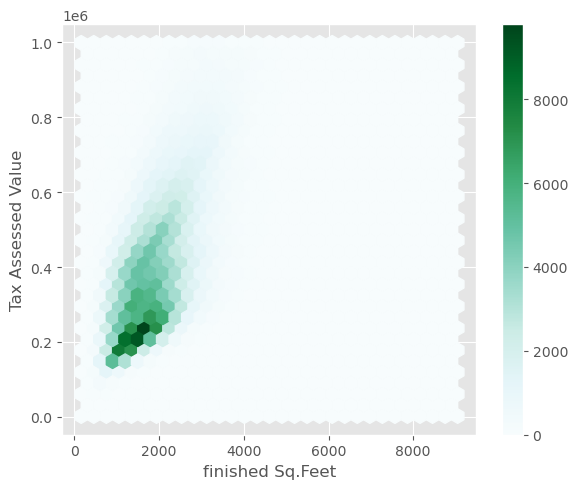

In [38]:
ax = kc_tax.plot.hexbin(x='SqFtTotLiving',
                        y='TaxAssessedValue',
                        gridsize=30, sharex=False,
                        figsize=(6,5))
ax.set_xlabel('finished Sq.Feet')
ax.set_ylabel('Tax Assessed Value')
plt.tight_layout()
plt.show()

The _seaborn_ kdeplot is a two-dimensional extension of the density plot. The calculation of the 2D-density for the full dataset takes several minutes. It is sufficient to create the visualization with a smaller sample of the dataset. With 10,000 data points, creating the graph takes only seconds. While some details may be lost, the overall shape is preserved. 

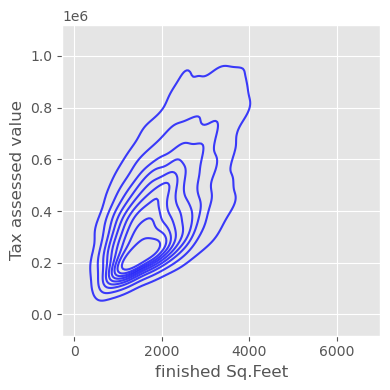

In [39]:
fig, ax = plt.subplots(figsize=(4,4))
sns.kdeplot(data=kc_tax.sample(10_000),
            x='SqFtTotLiving',
             y= 'TaxAssessedValue', ax=ax,
             color='blue', alpha= 0.75)
ax.set_xlabel('finished Sq.Feet')
ax.set_ylabel('Tax assessed value')
plt.tight_layout()
plt.show()


## Two Categorical Variable

Load the lc_loans dataset

In [40]:
lc_loans = pd.read_csv('data/lc_loans.csv')
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


As we can see the above dataframe both the variables are categorical 

In [41]:
lc_loans.shape

(450961, 2)

In [42]:
#Cross tabulation 
loans_pivot = lc_loans.pivot_table(index='grade',
                                   columns='status',
                                   aggfunc= lambda x: len(x), margins=True)
loans_pivot

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [43]:
df = loans_pivot.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All']= df['All'] /sum(df['All'])
perc_pivot = df
perc_pivot

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


# Categorical and Numerical Data

Pandas boxplots of a columns can be grouped by different column

In [44]:
airline_stats = pd.read_csv('data/airline_stats.csv')
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [45]:
airline_stats.shape

(33468, 4)

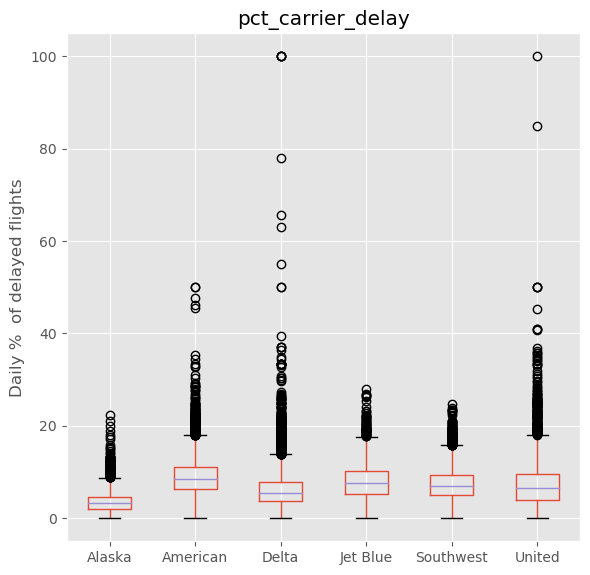

In [46]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay', figsize=(6,6))
ax.set_xlabel('')
ax.set_ylabel('Daily %  of delayed flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

## Violin Plots 
A violin plot is a type of data visualization that combines aspects of box plots and kernel density plots. It is a useful tool for summarizing the distribution of data and identifying patterns and outliers.

Here are some key points to consider when interpreting violin plots:
* The shape of the plot: The shape of the violin plot represents the distribution of the data. The width of the plot at a given point indicates the frequency of the data values at that point. A wider section of the plot means that there are more data values in that range, while a narrower section indicates fewer values.

* The median and quartiles: The horizontal line inside the violin plot represents the median, and the box around it shows the interquartile range (IQR), which includes the middle 50% of the data. The vertical lines (known as whiskers) extend from the box to show the range of the data, excluding any outliers.

* Outliers: Any data points outside the whiskers are considered outliers and are plotted as individual points. Outliers may indicate extreme values or errors in the data.

* Comparing multiple violins: When comparing multiple violin plots, it's important to look for differences in the shapes and widths of the plots. If one plot is wider or taller than another, it indicates that there are more data points in that range. If the plots overlap, it suggests that the data distributions are similar.

* The kernel density estimate: The violin plot also includes a kernel density estimate (KDE) that shows the overall shape of the distribution. The KDE is a smoothed curve that provides a visual representation of the data density. The height of the curve at a given point indicates the probability density of the data at that point.

In summary, violin plots are useful for visualizing the distribution of data and comparing multiple distributions. By considering the shape of the plot, the median and quartiles, outliers, and the kernel density estimate, you can gain insights into the underlying patterns and trends in the data.

Pandas also supports variation of boxplots called violinplot

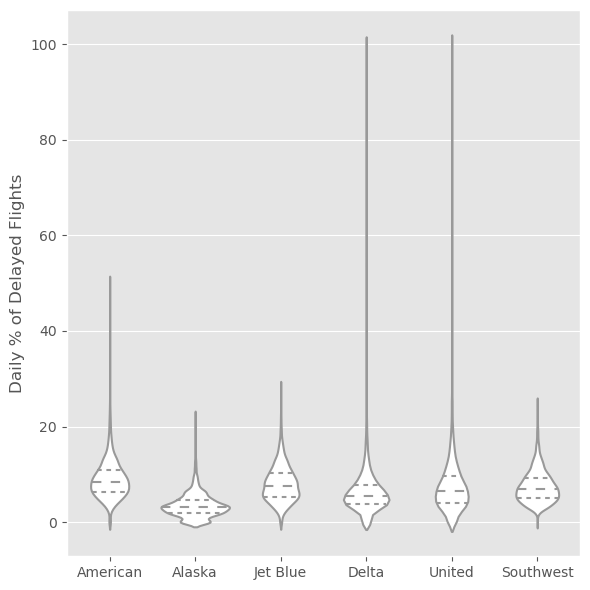

In [48]:
fig, ax = plt.subplots(figsize=(6,6))
sns.violinplot(data=airline_stats, x='airline',
               y='pct_carrier_delay',
               color='white', inner='quartile',
               ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

## Visualizing Multiple Variable

In [53]:
kc_tax['ZipCode'] = kc_tax['ZipCode'].astype(int)

In [56]:
kc_tax['ZipCode'].value_counts()

98115      14179
98042      13234
98023      11929
98117      11412
98103      11407
           ...  
9806501        1
95059          1
98             1
98204          1
98063          1
Name: ZipCode, Length: 113, dtype: int64

In [57]:
zip_codes = [98115, 98103, 98117, 98023]
kc_tax_zip = kc_tax[kc_tax['ZipCode'].isin(zip_codes)]
kc_tax_zip.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
113,593000.0,2450,98117
114,593000.0,340,98117
115,343000.0,840,98117
116,330000.0,1700,98117
117,350000.0,1060,98117


In [58]:
kc_tax_zip.shape

(48927, 3)

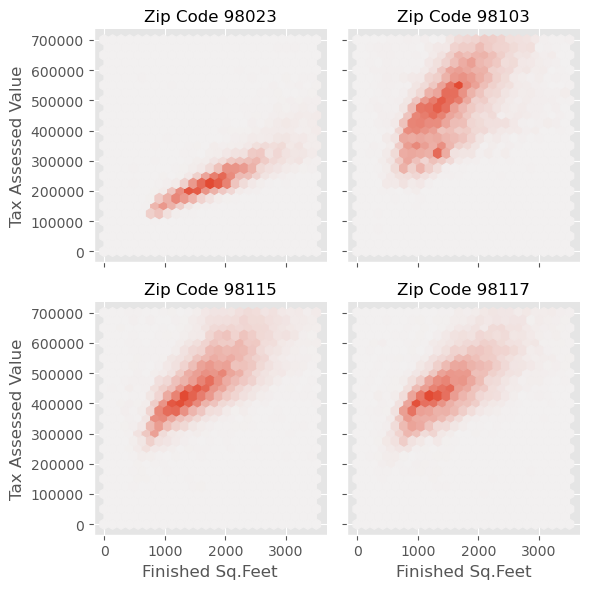

In [61]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Sq.Feet', 'Tax Assessed Value')
g.set_titles('Zip Code {col_name:.0f}')

plt.tight_layout()
plt.show()